In [ ]:
!pip install kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download arashnic/faces-age-detection-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 96% 46.0M/47.8M [00:02<00:00, 24.7MB/s]
100% 47.8M/47.8M [00:02<00:00, 16.8MB/s]


In [ ]:
! unzip faces-age-detection-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Train/4047.jpg          
  inflating: Train/4049.jpg          
  inflating: Train/405.jpg           
  inflating: Train/4051.jpg          
  inflating: Train/4052.jpg          
  inflating: Train/4053.jpg          
  inflating: Train/4055.jpg          
  inflating: Train/4056.jpg          
  inflating: Train/4057.jpg          
  inflating: Train/4058.jpg          
  inflating: Train/4059.jpg          
  inflating: Train/406.jpg           
  inflating: Train/4060.jpg          
  inflating: Train/4061.jpg          
  inflating: Train/4062.jpg          
  inflating: Train/4065.jpg          
  inflating: Train/4066.jpg          
  inflating: Train/4068.jpg          
  inflating: Train/4069.jpg          
  inflating: Train/407.jpg           
  inflating: Train/4070.jpg          
  inflating: Train/4072.jpg          
  inflating: Train/4073.jpg          
  inflating: Train/4076.jpg          
  inflating: Train/4078.jpg          

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import sys
import keras
import numpy as np
from sklearn import metrics
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import seaborn as sns
from skimage.filters import meijering
from tensorflow.keras.layers import BatchNormalization
from sklearn.manifold import TSNE
path = '/content/Train'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
category = ["Young", "Middle", "Old"]

In [ ]:
path = '/content/Train'
img_arr_shape = []
for img in os.listdir(path):
    img_arr_shape.append(cv2.imread(os.path.join(path, img)).shape)

In [ ]:
leng = []
wid = []
for x in img_arr_shape:
    leng.append(x[0])
    wid.append(x[1])
    
print("Min length: ", min(leng), "Max length: ", max(leng))
print("Min width: ", min(wid), "Max width: ", max(wid))

Min length:  11 Max length:  713
Min width:  8 Max width:  724


In [ ]:
train_arr = []
label = []
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = cv2.resize(img_array, (100,100)) #resizing the image
    ## Using median denoising filter to denoise the data
    img_array = cv2.medianBlur(img_array,3)
    ## Using meijering filter to detect wrinkles
    # img_array = meijering(img_array)
    train_arr.append(img_array)
    label.append(img)
    

In [ ]:
train_arr = np.asarray(train_arr)

In [ ]:
train_arr.shape

(19906, 100, 100, 3)

In [ ]:
df = pd.read_csv('train.csv')
label = [x.split('.')[0] for x in label]

In [ ]:
df['ID']  = [x.split('.')[0] for x in df['ID']]
df = df.sort_values(by=['ID'])

In [ ]:
df['Class'] = le.fit_transform(df['Class'])

In [ ]:
temp_df = pd.DataFrame({'label':label})
df = pd.merge(temp_df, df,how = "inner", left_on = 'label', right_on = "ID")

In [ ]:
list(df['ID']) == label

True

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_arr, df['Class'], test_size= 0.30, random_state=2)

In [ ]:
# Normalizing the images
X_train = X_train/ 255
X_test = X_test/ 255


In [ ]:
#converting to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


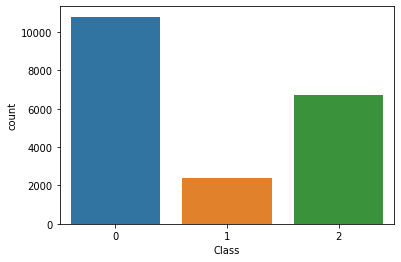

In [ ]:
sns.countplot(df['Class'])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
with tf.device(device_name):
    model = Sequential()
    data_augmentation,
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100,3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(3, activation='softmax'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
hist_mode = model.fit(X_train, y_train,
    epochs=20, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
175/175 [==============================] - 15s 80ms/step - loss: 0.9388 - accuracy: 0.5797 - val_loss: 1.2931 - val_accuracy: 0.5508
Epoch 2/20
175/175 [==============================] - 14s 78ms/step - loss: 0.7824 - accuracy: 0.6527 - val_loss: 1.3208 - val_accuracy: 0.5633
Epoch 3/20
175/175 [==============================] - 14s 78ms/step - loss: 0.7357 - accuracy: 0.6736 - val_loss: 1.0614 - val_accuracy: 0.5996
Epoch 4/20
175/175 [==============================] - 14s 79ms/step - loss: 0.7087 - accuracy: 0.6898 - val_loss: 1.1428 - val_accuracy: 0.6039
Epoch 5/20
175/175 [==============================] - 14s 79ms/step - loss: 0.6815 - accuracy: 0.7043 - val_loss: 0.9353 - val_accuracy: 0.6268
Epoch 6/20
175/175 [==============================] - 14s 79ms/step - loss: 0.6587 - accuracy: 0.7195 - val_loss: 0.7939 - val_accuracy: 0.6681
Epoch 7/20
175/175 [==============================] - 14s 79ms/step - loss: 0.6412 - accuracy: 0.7253 - val_loss: 0.8405 - val_accuracy:

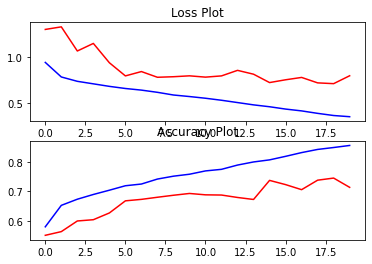

In [ ]:
f,ax=plt.subplots(2,1) 

ax[0].title.set_text('Loss Plot')
ax[0].plot(hist_mode.history['loss'],color='b',label='Training Loss')
ax[0].plot(hist_mode.history['val_loss'],color='r',label='Validation Loss')

ax[1].title.set_text('Accuracy Plot')
ax[1].plot(hist_mode.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(hist_mode.history['val_accuracy'],color='r',label='Validation Accuracy')

In [ ]:
y_pred = model.predict(X_test)
classes = np.argmax(y_pred, axis=-1)
classes = to_categorical(classes)
print(metrics.classification_report(y_test, classes))

187/187 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      3227
           1       0.46      0.58      0.51       740
           2       0.76      0.70      0.73      2005

   micro avg       0.72      0.72      0.72      5972
   macro avg       0.66      0.68      0.67      5972
weighted avg       0.73      0.72      0.72      5972
 samples avg       0.72      0.72      0.72      5972



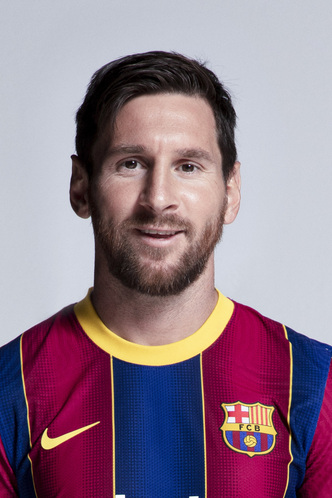

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import Image, display
img = cv2.imread('/content/MESSI.jpg')
display(Image('/content/MESSI.jpg'))

In [ ]:
img = cv2.resize(img,(100,100))
display(Image(img))
img = np.reshape(img,[1,100,100,3])


In [ ]:
class1 = model.predict(img)
print(class1)
print(np.argmax(class1))

1/1 [==============================] - 0s 16ms/step
[[1.2593502e-20 0.0000000e+00 1.0000000e+00]]
2


In [ ]:
results=dict(zip(le.inverse_transform(np.unique(df['Class'])), class1.squeeze()))

In [ ]:
print(le.inverse_transform(np.unique(df['Class'])))
results

['MIDDLE' 'OLD' 'YOUNG']


{'MIDDLE': 1.2593502e-20, 'OLD': 0.0, 'YOUNG': 1.0}